## Nama: Syahlla

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from __future__ import print_function
from sklearn.gaussian_process.kernels import PairwiseKernel
import keras

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, Nadam

# 2. Download data MNIST, lalu pisah menjadi training set dan test set

### Kode di bawah digunakan untuk mengimpor dataset MNIST menggunakan pustaka Keras. Data MNIST adalah kumpulan gambar angka tulisan tangan dari 0 hingga 9 dan digunakan untuk klasifikasi. Dataset ini dimuat dengan menggunakan fungsi mnist.load_data(), yang membaginya menjadi data latih (training data) dan data uji (testing data), serta label latih (training labels) dan label uji (testing labels). Label latih berisi gambar yang akan digunakan untuk melatih model, sedangkan label uji berfungsi untuk menguji kinerja model. Label latih menunjukkan jumlah sampel dan dimensi masing-masing data, dan bentuk (shape) data latih ditampilkan dalam hasil cetakan.


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### **Output:**
Output yang didapatkan memberikan informasi tentang dimensi (shape) dari kedua data latih dan label latih dalam dataset MNIST. Data latih terdiri dari 60.000 gambar, masing-masing berukuran 28 x 28 piksel, dan 60.000 label yang sesuai dengan gambar-gambar tersebut, yang diwakili dalam array satu dimensi.

In [ ]:
print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

11490434/11490434 [==============================] - 0s 0us/step
Training Data: (60000, 28, 28)
Training Labels: (60000,)


### **Output:**
Output yang didapatkan memberikan informasi tentang dimensi (bentuk) dari data uji dan label uji dalam dataset MNIST. Data uji terdiri dari 10.000 gambar, dengan setiap gambar berukuran 28 x 28 piksel. Selain itu, terdapat 10.000 label yang sesuai dengan gambar-gambar tersebut, yang diwakili dalam array satu dimensi.

In [ ]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


# 3. Visualisasikan beberapa data yang ada pada training set

### Kodingan dibawah menampilkan visualisasi 36 sampel pertama dari dataset latih MNIST, dengan gambar angka tulisan tangan dan label di setiap sel dalam grid 6x6, ini dilakukan menggunakan matplotlib. Setiap gambar ditampilkan dengan warna yang disesuaikan dengan skema "cividis". Setiap gambar memiliki sumbu yang disembunyikan, dan judul yang sesuai dengan labelnya ditambahkan. Setiap gambar juga memiliki informasi tentang jumlah sampel dengan label yang sama.

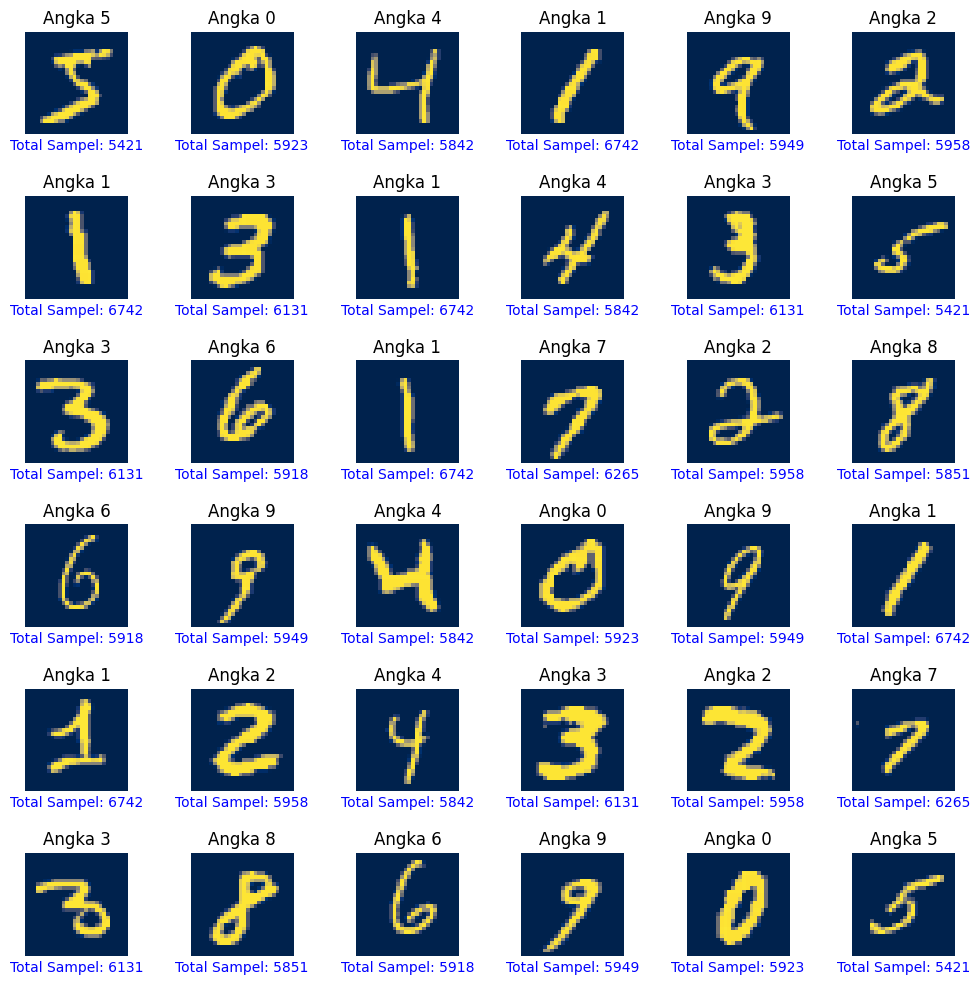

In [ ]:
fig, axs = plt.subplots(6, 6, figsize=(12, 12))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap='cividis')
    ax.axis('off')
    ax.set_title(f'Angka {y_train[i]}', fontsize=12)

    class_count = np.sum(y_train == y_train[i])
    ax.annotate(f'Total Sampel: {class_count}', (0.5, -0.15), xycoords='axes fraction',
                fontsize=10, color='blue', ha='center')

plt.show()

# 4. Clustering menggunakan K-Means dan predict data test set

### **Pre-Processing**

1. Mengubah dimensi data:
Mengubah data gambar 2D menjadi array 1D adalah langkah pertama. Array x_train berisi gambar-gambar dengan dimensi (jumlah sampel, tinggi, dan lebar). Dengan menggunakan reshape, data diubah menjadi array 1D dengan panjang yang sama dengan jumlah fitur (tinggi x lebar), dan setiap gambar diubah menjadi array 1D.


2. Normalisasi data:
Selanjutnya, nilai piksel dinormalisasi dari rentang 0-255, yang merupakan nilai standar untuk data gambar, menjadi rentang 0-1. Ini dilakukan dengan membagi nilai piksel setiap piksel oleh 255.

---

**Output:**

*   Pada hasil (60000, 784). Sebelumnya, data x_train memiliki dimensi empat dimensi yang mewakili gambar-gambar dalam dataset (jumlah sampel, lebar, tinggi, dan saluran warna). Namun, setelah penyesuaian, data diubah menjadi dua dimensi, dan setiap gambar ditampilkan sebagai array 1D dengan panjang 784 (28 x 28 piksel setelah diflatten), dan dataset memiliki 60000 gambar.

*   Pada hasil Hasil elemen pertama X (784,) yang menunjukkan bahwa setiap gambar, setelah dihaluskan, memiliki panjang 784, yang setara dengan 28 x 28 piksel.



In [3]:
#Mengubah menjadi Data 1D
X = x_train.reshape(len(x_train),-1)

#Mengurangi Dimensi
Y = y_train

#Normalisasi
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


### **Klastering**
### Koding di bawah menerapkan algoritma Mini-Batch K-Means, varian K-Means yang efektif untuk dataset besar, menggunakan pustaka scikit-learn. Pertama, jumlah kluster yang diinginkan dihitung dengan melihat berapa banyak label unik yang ditemukan dalam data uji (y_test). Hasil disimpan dalam variabel n_digits, dan kemudian dibuat objek MiniBatchKMeans dengan jumlah kluster yang sesuai dengan n_digits. Data yang telah diproses sebelumnya ditambahkan untuk memulai proses pelatihan. Kemudian model Mini-Batch K-Means siap digunakan untuk klasterisasi data, yang akan membagi data menjadi kelompok berdasarkan karakteristiknya.

---
**Output:**
Hasil yang didapatkan pada algoritma Mini-Batch K-Means yaitu mencoba membentuk sepuluh kelompok berbeda dari data dengan sepuluh pusat kluster yang merupakan pusat dari masing-masing kelompok.




In [4]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

kmeans = MiniBatchKMeans(n_clusters = n_digits)
kmeans.fit(X)

10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

### Setelah data diklasifikasikan, kode kmeans.labels_ untuk mengakses atribut label_ objek kmeans. Hasilnya adalah sebuah array yang menyimpan label kluster untuk setiap data yang termasuk dalam dataset. Label kluster yang telah ditetapkan untuk setiap elemen dalam array tersebut merupakan representasi dari data yang sesuai.


---

**Output:**
Setiap angka dalam array menunjukkan kluster (atau kelompok) yang telah diberikan kepada data yang sesuai. Hasil array ini menunjukkan data yang telah terklaster. Yaitu, angka 2 menunjukkan kluster pertama, angka 1 menunjukkan kluster kedua, angka 3 menunjukkan kluster ketiga, dst.

In [5]:
kmeans.labels_

array([1, 5, 6, ..., 1, 5, 9], dtype=int32)

# 5. Tunjukkan hasil predict berupa image dan clusternya. Tiap nomor yang terprediksi harus dalam satu cluster

### (Karena ini adalah clustering, image nomor 4 bisa saja di cluster nomor 10, namun cluster nomor 10 hanya boleh berisi nomor 4).

### **Inferensi Label**
### Label yang paling sering muncul di setiap kluster hasil klasterisasi diidentifikasi dengan menggunakan fungsi infer_cluster_labels. Jumlah masing-masing label muncul dihitung dalam setiap kluster. Label kluster yang paling sering muncul dianggap sebagai labelnya. Label kluster yang telah diidentifikasi dihubungkan dengan data asli dengan fungsi infer_data_labels. Jika sebuah kluster berisi sebagian besar data dengan label "0", label kluster tersebut dianggap sebagai "0".

In [6]:
def infer_cluster_labels(kmeans, actual_labels):

    inferred_labels = {}

    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

### **Evaluasi hasil**
### Kodingan di bawah merupakan hasil klustering dengan menggunakan algoritma K-means pada data latih untuk mengelompokkan data menjadi beberapa kluster. Pertama, fungsi infer_cluster_labels digunakan untuk melakukan inferensi label kluster, memasukkan hasil klustering kmeans dan label sebenarnya Y. Kemudian, hasil prediksi kluster untuk setiap sampel di dataset latih dibuat menggunakan kmeans.predict(X) dan disimpan dalam X_clusters. Selanjutnya, inferensi label data dilakukan menggunakan infer_data_labels, memasukkan hasil prediksi kluster dan label kluster yang telah dibuat sebelumnya.


---
**Output:**
Hasil menunjukkan 20 prediksi label kluster untuk data latih pertama, yang dibandingkan dengan label sebenarnya. Hasil ini, ada perbedaan antara label prediksi (bawah) dan label sebenarnya (atas), yang berarti bahwa beberapa angka tidak diprediksi dengan benar. Misalnya, angka 9 dianggap sebagai kluster 7 dan angka 2 dianggap sebagai kluster 8. Ini menunjukkan bahwa model belum sepenuhnya akurat dalam mengkategorikan angka-angka tertentu ke dalam kluster yang benar.


In [7]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[5 0 4 1 7 8 1 5 1 7 5 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


# 6. Optimasi cluster degan memodifikasi code yang telah diberikan dan jelaskan masing-masing step menggunakan markdown

### Kode di bawah menyatakan fungsi calculate_metrics. Fungsi ini digunakan untuk menghitung dan mencetak berbagai metrik evaluasi kualitas klustering pada model estimator yang tersedia. Jumlah kluster, inersia (inertia), dan homogenitas adalah metrik yang dihitung. Atribut n_kluster pada model estimator digunakan untuk menghitung jumlah kluster, sedangkan atribut inertia_ digunakan untuk menghitung inersia. Untuk menghitung homogenitas, fungsi metrik digunakan. nilai homogenitas melalui perbandingan label yang sebenarnya dengan label hasil klustering dari estimator. Sejauh mana setiap kluster hanya memiliki anggota dari satu kelas tertentu disebut homogenitas. Nilai yang dihasilkan digunakan sebagai evaluasi kesesuaian label dengan hasil kluster.




In [20]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

### **Optimasi Klaster**
### Kodingan di bawah menggunakan algoritma Mini Batch K-means untuk melakukan eksperimen dengan berbagai jumlah kluster, yang berkisar antara 300, 400, 500, dan 1000. Untuk setiap iterasi, model Mini Batch K-means dilatih dengan jumlah kluster tertentu, dan metrik evaluasi seperti jumlah kluster, inersia, homogenitas, dan akurasi dihitung dan dicetak. Jumlah kluster dan inersia adalah karakteristik internal dari model, sedangkan homogenitas dan akurasi memberikan gambaran tentang seberapa baik model memisahkan data menjadi kluster yang sesuai dengan label sebenarnya.


---
**Output:**
Didapatkan kenaikan kualitas dari cluster 300 sampai cluster 1000. 1000 kluster digunakan dan menghasilkan hasil terbaik. Anggota dalam satu kluster berada cukup dekat dengan pusat klusternya dibuktikan dengan tingkat inersia yang rendah. Setiap kluster memiliki anggota dari satu kelas yang lebih sesuai dibuktikan dengan nilai homogenitas yang tinggi (0.902). Saat menggunakan 1000 kluster, model Mini Batch K-means memisahkan data dengan baik sesuai dengan label aslinya, yang ditunjukkan oleh akurasi yang tinggi (0.93). Karena di cluster 1000 sudah di angka 0.9, maka n_clusters_optimum = 1000 akan digunakan.



In [16]:
clusters = [300, 400, 500, 1000]
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)

    calculate_metrics(estimator, X, Y)

    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 300
Inertia: 1477072.7477136464
Homogeneity: 0.8497454150610262
Accuracy: 0.9021



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 400
Inertia: 1421677.568856829
Homogeneity: 0.8660280055155725
Accuracy: 0.9135166666666666



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 500
Inertia: 1377235.1095523527
Homogeneity: 0.8798990298737356
Accuracy: 0.9233666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 1000
Inertia: 1262562.5087422936
Homogeneity: 0.9019102170554821
Accuracy: 0.9313166666666667



### **Optimum n_cluster**
### Kode di bawah ini menggunakan Algoritma MiniBatchKMeans untuk melakukan klastering dengan jumlah 1000 klaster, yang disimpan dalam variabel n_clusters_optimum. Pertama, model klastering MiniBatchKMeans disesuaikan dengan dimensi data (X). Kemudian, fungsi calculate_metrics digunakan untuk mencetak metrik evaluasi seperti jumlah klaster, inertia, dan homogenitas. Label klaster dan nomor klaster yang sesuai juga dicetak. Label yang termasuk dalam setiap klaster juga ditampilkan. Selain itu, metrik akurasi digunakan untuk mencetak perbandingan hasil prediksi dengan label asli. Hasil akhir ini memberikan gambaran tentang klaster yang dihasilkan, label yang termasuk dalam masing-masing klaster, dan bagaimana klaster secara keseluruhan melakukan prediksi dengan akurat.


---
### **Output:**
Hasil klastering menggunakan algoritma MiniBatchKMeans dengan 1000 klaster diberikan dalam output ini. Nilai sekitar 1259562.597 diberikan untuk inertia, yang menunjukkan seberapa padatnya klaster. Dengan nilai sekitar 0.900, metrik homogenitas menunjukkan bahwa klaster yang dihasilkan cenderung homogen. Selanjutnya, setiap klaster ditunjukkan dengan nomornya dan label-labelnya. Misalnya, klaster 0 memiliki label 0, klaster 1 memiliki label 1, dan seterusnya. Sekitar 0.930 adalah akurasi prediksi hasil klastering terhadap label asli, menunjukkan seberapa baik model klastering memetakan data ke dalam klaster yang sesuai dengan labelnya. Hasil akhir ini memberikan gambaran tentang kualitas klastering, yang mencakup tingkat homogenitas dan akurasi prediksi yang tinggi untuk 1000 klaster dan dapat dibuktikan dari kesesuaian cluster dengan labelnya.

In [15]:
n_clusters_optimum = 1000

estimator = MiniBatchKMeans(n_clusters=n_clusters_optimum)
estimator.fit(X)

print(f"\nResults for {n_clusters_optimum} clusters:")
calculate_metrics(estimator, X, Y)

cluster_labels = infer_cluster_labels(estimator, Y)
predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)

# Nomor cluster beserta label
for cluster_num in range(n_clusters_optimum):
    samples_in_cluster = Y[predicted_Y == cluster_num]
    if len(samples_in_cluster) > 0:
        print(f"Cluster {cluster_num} labels: {samples_in_cluster}")

print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Results for 1000 clusters:
Number of Clusters: 1000
Inertia: 1259562.5970166037
Homogeneity: 0.8997104398098336
Cluster 0 labels: [0 0 0 ... 0 0 0]
Cluster 1 labels: [1 1 1 ... 1 1 1]
Cluster 2 labels: [2 2 2 ... 2 2 2]
Cluster 3 labels: [3 3 3 ... 3 3 3]
Cluster 4 labels: [4 4 4 ... 4 4 4]
Cluster 5 labels: [5 5 5 ... 5 5 5]
Cluster 6 labels: [6 6 6 ... 6 6 6]
Cluster 7 labels: [7 7 7 ... 7 7 7]
Cluster 8 labels: [8 8 8 ... 8 8 8]
Cluster 9 labels: [9 9 9 ... 9 9 9]
Accuracy: 0.9301166666666667



# Visualisasi dari cluster beserta label yang sesuai

### Kodingan di bawah bertujuan untuk menampilkan visualisasi dari 26 klaster pertama setelah melakukan klastering dengan algoritma MiniBatchKMeans menggunakan 1000 klaster. Pertama, model dibuat dengan jumlah klaster yang telah ditentukan sebelumnya (1000 klaster), dan kemudian dilatih dengan data yang telah diubah dimensinya (X). Setelah itu, centroid dari setiap klaster diambil dan diubah menjadi gambar berukuran 28 x 28 piksel. Kemudian, gambar-gambar ini diatur untuk ditampilkan dalam grid berukuran 5 x 5. Label yang diinferensi untuk masing-masing klaster juga ditampilkan di bawah gambar. Hasil akhir adalah visualisasi representatif dari 26 klaster pertama.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


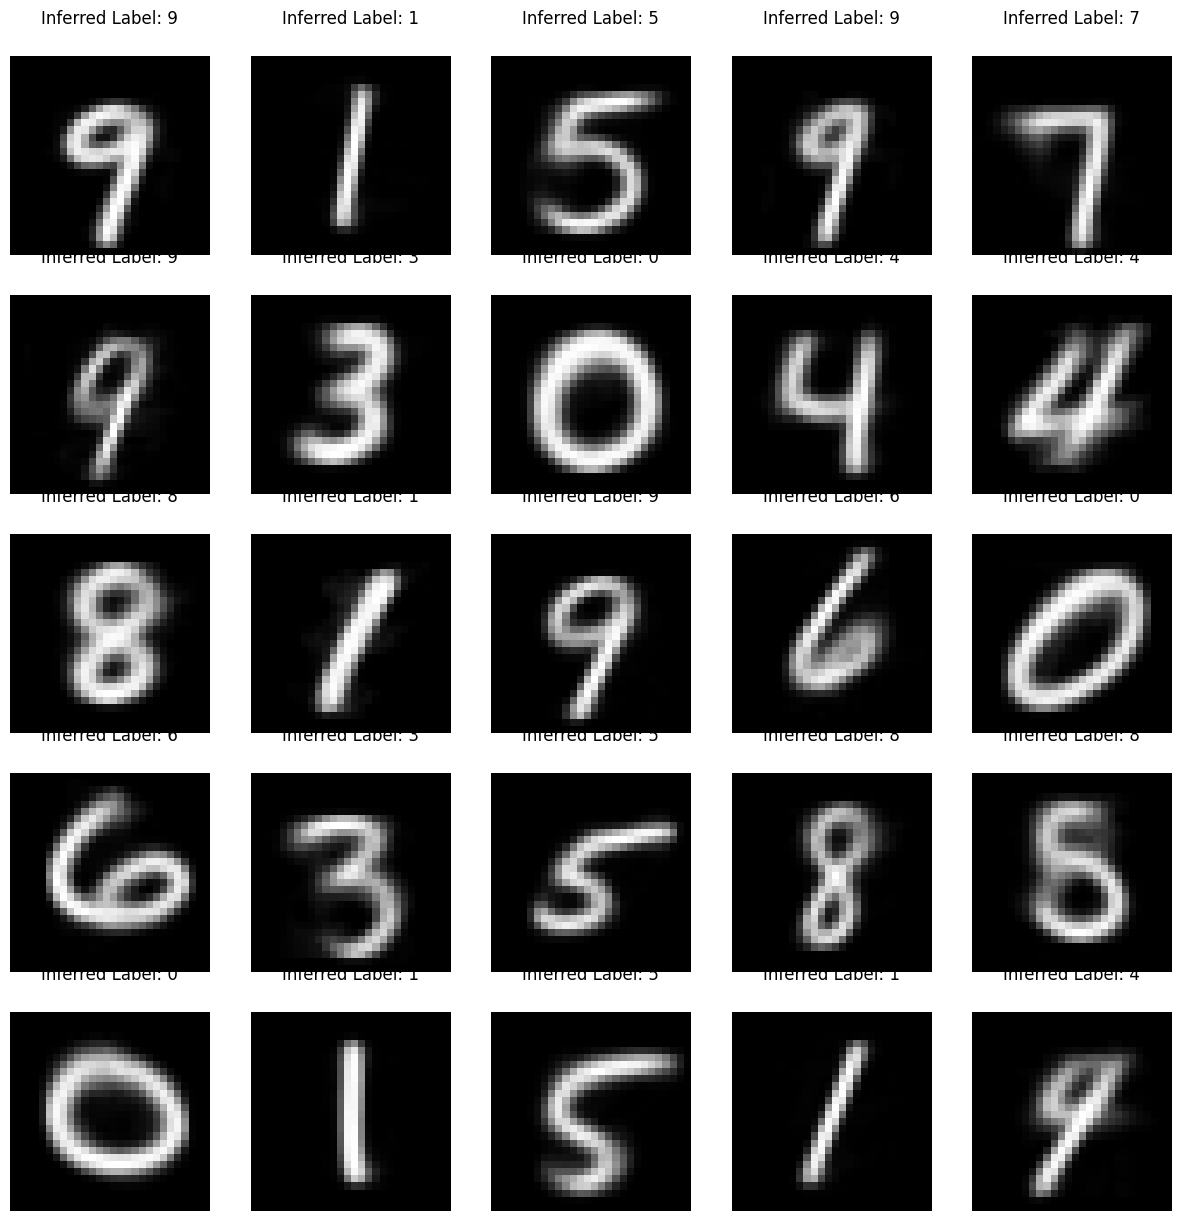

In [18]:
n_clusters_to_display = 26

kmeans = MiniBatchKMeans(n_clusters=n_clusters_optimum)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

images = centroids.reshape(n_clusters_optimum, 28, 28)
images *= 255
images = images.astype(np.uint8)

cluster_labels = infer_cluster_labels(kmeans, Y)
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
plt.gray()

count = 0
for i in range(5):
    for j in range(5):
        ax = axs[i, j]
        for key, value in cluster_labels.items():
            if count in value:
                ax.set_title('Inferred Label: {}'.format(key))
        ax.matshow(images[count])
        ax.axis('off')
        count += 1
        if count >= n_clusters_to_display:
            break

plt.show()

